# This script processes the file All_Optimizations.csv  

1. Run process_sycl_cuda_results.ipynb to get the file All_OptimizationsSYCL-CUDA.csv:

2. Run the next cells in this notebook...

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

df=pd.read_csv('All_Optimizations.csv',sep=';')
df=df.drop(df.index[4:28])
df.reset_index(drop=True, inplace=True)
df.insert(4,"Total",0)
df['Total']=df['TimeTree']+df['TimeOWM']
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
print(df)
dfs

  Optimization   Cloud  TimeTree   TimeOWM      Total  Level  MinRadMaxNum
0     Baseline   Alcoy  4.737780  3.733700   8.471480      0           0.0
1     Baseline   Arzua  5.749600  4.105800   9.855400      0           0.0
2     Baseline  BrionF  5.971560  6.233900  12.205460      0           0.0
3     Baseline  BrionU  6.761090  7.327300  14.088390      0           0.0
4  Opt4-MinRad   Alcoy  0.167986  0.275714   0.443700      5           1.8
5  Opt4-MinRad   Arzua  0.329102  0.270224   0.599326      5           0.5
6  Opt4-MinRad  BrionF  0.766410  0.276490   1.042900      4           0.1
7  Opt4-MinRad  BrionU  0.866690  0.336850   1.203540      4           0.1


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128
4,owm-sycl-cpu-nomemo,Alcoy,0.39146,0.22724,0.61870,0,64
5,owm-sycl-cpu-nomemo,Arzua,0.81833,0.26675,1.08508,0,128
6,owm-sycl-cpu-nomemo,BrionF,0.96195,0.20382,1.16577,0,512
7,owm-sycl-cpu-nomemo,BrionU,1.09199,0.23396,1.32595,0,512
8,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64
9,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128


In [12]:
base=df.loc[0:3,'TimeTree':'Total']
best=dfs.loc[16:19,'TimeTree':'Total']
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print("Speedup of cuda over OMP baseline:")
print(speedup)

Speedup of cuda over OMP baseline:
[[172.03x 28.11x 52.83x]
 [103.60x 21.41x 39.86x]
 [75.64x 40.87x 52.73x]
 [82.98x 43.27x 56.17x]]


In [15]:
base=df.loc[4:7,'TimeTree':'Total']
best=dfs.loc[16:19,'TimeTree':'Total']
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print("Speedup of cuda over optim 4 TBB best execution:")
print(speedup)

Speedup of cuda over optim 4 TBB best execution:
[[6.10x 2.08x 2.77x]
 [5.93x 1.41x 2.42x]
 [9.71x 1.81x 4.51x]
 [10.64x 1.99x 4.80x]]


# Speedup of each optimization w.r.t. the previous one

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. the previous one
for i in range(4,len(dfm)):
    dfm.loc[i,'TreeSp']=dfm['TimeTree'][i-4]/dfm['TimeTree'][i]
    dfm.loc[i,'OWMSp']=dfm['TimeOWM'][i-4]/dfm['TimeOWM'][i]
    dfm.loc[i,'TotalSp']=dfm['Total'][i-4]/dfm['Total'][i]
dfm

,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,1.000000,1.000000,1.000000
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,1.000000,1.000000,1.000000
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,1.000000,1.000000,1.000000
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,1.000000,1.000000,1.000000
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,1.351100,0.832419,1.121955
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,2.291223,0.600322,1.478279
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,1.049453,0.689308,0.996090
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,1.630870,0.760858,1.459536
8,owm-cuda,Alcoy,0.02754,0.13281,0.16035,0,16,10.532317,1.728484,3.240536
9,owm-cuda,Arzua,0.05550,0.19173,0.24723,0,32,6.406667,1.717206,2.769931


# Speedup of each optimization w.r.t. baseline

In [24]:
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. owm-sycl-cpu
for i in range(4,len(dfm),4):
    for j in range(4):
        dfm.loc[i+j,'TreeSp']=dfm['TimeTree'][j]/dfm['TimeTree'][i+j]
        dfm.loc[i+j,'OWMSp']=dfm['TimeOWM'][j]/dfm['TimeOWM'][i+j]
        dfm.loc[i+j,'TotalSp']=dfm['Total'][j]/dfm['Total'][i+j]
dfm


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,1.000000,1.000000,1.000000
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,1.000000,1.000000,1.000000
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,1.000000,1.000000,1.000000
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,1.000000,1.000000,1.000000
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,1.351100,0.832419,1.121955
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,2.291223,0.600322,1.478279
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,1.049453,0.689308,0.996090
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,1.630870,0.760858,1.459536
8,owm-cuda,Alcoy,0.02754,0.13281,0.16035,0,16,14.230211,1.438822,3.635734
9,owm-cuda,Arzua,0.05550,0.19173,0.24723,0,32,14.679099,1.030877,4.094730


# Improvement Factor for each cloud

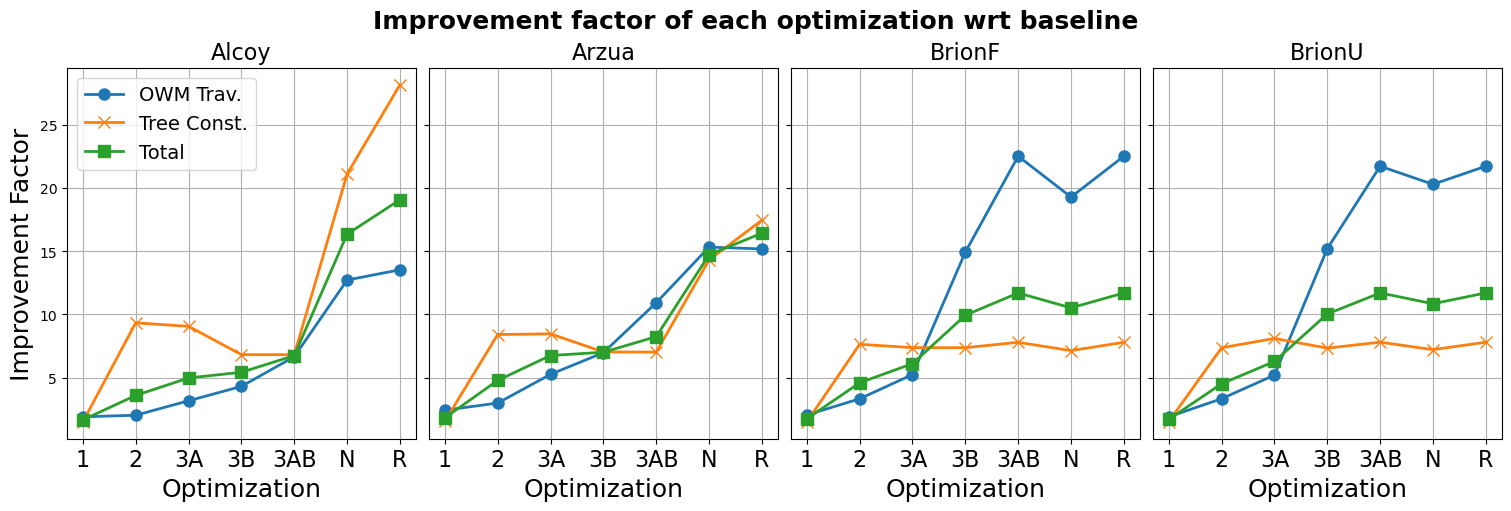

In [71]:
def plot_allsp(df,xlab):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    all=np.array(df.loc[4:,'TreeSp':'TotalSp'])
    clouds=list(df.loc[0:3,'Cloud'])
    bycloud={}
    for i,j in zip(clouds,range(len(clouds))):
        bycloud[i]=all[j::4].T

    #fig = plt.figure()
    labels=['OWM Trav.','Tree Const.','Total']
    x=np.arange(1,len(xlab)+1)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(len(clouds)),clouds):
        axs[i].plot(x, bycloud[name][1], marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][0], marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][2], marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Optimization', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=xlab,fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Improvement factor of each optimization wrt baseline',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Improvement Factor', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_optim.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()


plot_allsp(df,['1','2','3A','3B','3AB','N','R'])

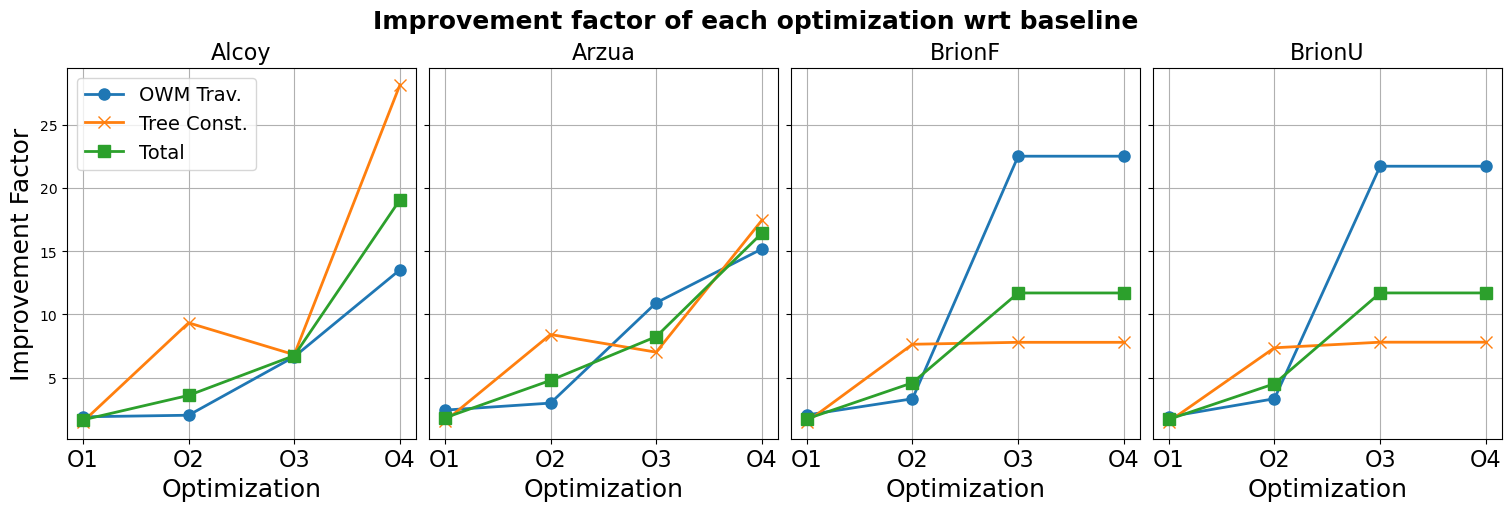

In [72]:
dfsel=df.drop(df.index[12:20]) #drom memoA and memoB. Leave only memoAB
dfsel=dfsel.drop(dfsel.index[16:20]) #drom maxNumber. Leave only minRadius
plot_allsp(dfsel,['O1','O2','O3','O4'])

In [75]:
#print(dfsel)
all=np.array(dfsel.loc[4:,'TreeSp':'TotalSp'])
clouds=list(dfsel.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j::4]
bycloud    
#bycloud['Alcoy'][1]
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}%".format(x)})
for i in clouds:
    bycloud[i]=bycloud[i]/bycloud[i][-1]*100
    #print(bycloud[i])
print("Adapt for stacked bar plot")    
for i in clouds:
    for j in range(3,0,-1):
        bycloud[i][j]=bycloud[i][j]-bycloud[i][j-1]
    print(bycloud[i])
# allcloudstack=bycloud['Alcoy']#[:,0:2]
# for i in clouds[1:]:
#     allcloudstack=np.hstack((allcloudstack,bycloud[i]))
# allcloudstack[0][0::3]    
#allcloudstack.transpose(2,1,0)    
bycloud
#here the order of the indices are cloud, optimization,time
all=np.array([bycloud[x] for x in clouds])
all.shape
#see this to understand the transpose https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
#now the order of the indices are time, optimization, cloud
all=all.transpose(2,1,0)

all
   

Adapt for stacked bar plot
[[5.28% 13.92% 8.60%]
 [27.82% 0.93% 10.17%]
 [-8.95% 34.25% 16.53%]
 [75.85% 50.91% 64.71%]]
[[8.72% 15.90% 10.95%]
 [39.40% 3.66% 18.07%]
 [-8.00% 52.35% 21.10%]
 [59.87% 28.08% 49.88%]]
[[19.04% 9.00% 14.69%]
 [78.96% 5.69% 24.46%]
 [2.00% 85.31% 60.85%]
 [0.00% 0.00% 0.00%]]
[[19.28% 8.66% 14.35%]
 [75.04% 6.59% 24.14%]
 [5.68% 84.74% 61.51%]
 [0.00% 0.00% 0.00%]]


array([[[5.28%, 8.72%, 19.04%, 19.28%],
        [27.82%, 39.40%, 78.96%, 75.04%],
        [-8.95%, -8.00%, 2.00%, 5.68%],
        [75.85%, 59.87%, 0.00%, 0.00%]],

       [[13.92%, 15.90%, 9.00%, 8.66%],
        [0.93%, 3.66%, 5.69%, 6.59%],
        [34.25%, 52.35%, 85.31%, 84.74%],
        [50.91%, 28.08%, 0.00%, 0.00%]],

       [[8.60%, 10.95%, 14.69%, 14.35%],
        [10.17%, 18.07%, 24.46%, 24.14%],
        [16.53%, 21.10%, 60.85%, 61.51%],
        [64.71%, 49.88%, 0.00%, 0.00%]]])

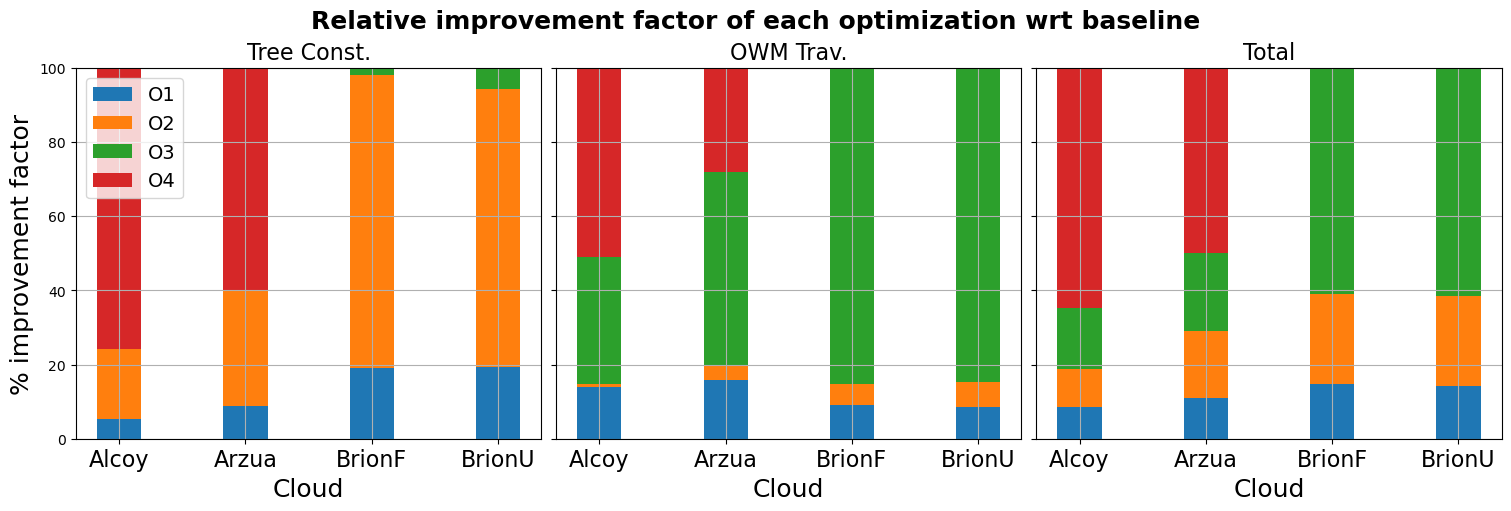

In [74]:
def plot_allsp100(npa):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']


    #fig = plt.figure()
    plots=['Tree Const.','OWM Trav.','Total']
    clouds=['Alcoy','Arzua','BrionF','BrionU']
    x=np.arange(1,len(clouds)+1)
    optim=['O1','O2','O3','O4']
    width=0.35
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(len(plots)),plots):
        b=np.zeros(len(clouds))
        for j,z in zip(optim,range(len(optim))):
            axs[i].bar(x, npa[i][z], width, label=j, bottom=b)
            b=b+npa[i][z]

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Cloud', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=clouds,fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Relative improvement factor of each optimization wrt baseline',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('% improvement factor', fontsize=ylabelfs)
    axs[0].legend(optim,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_optim_ratio.pdf")
    pp.savefig(fig)
    pp.close()

plot_allsp100(all)

# Build LaTeX table with speedups due to all optimizations (relative to baseline)

In [86]:
dfsel.reset_index(drop=True, inplace=True)
print(dfsel.loc[4:,'TreeSp':'TotalSp'])
all=np.array(dfsel.loc[4:,'TreeSp':'TotalSp'])
clouds=list(dfsel.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j:20:4]

np.set_printoptions(formatter={'float': lambda x: "& {0:0.2f}x ".format(x)})    
bycloud


       TreeSp      OWMSp    TotalSp
4    1.489414   1.884565   1.641070
5    1.524078   2.415461   1.800958
6    1.483393   2.029264   1.719658
7    1.503865   1.883964   1.680168
8    9.334975   2.010078   3.581991
9    8.408061   2.972181   4.772059
10   7.635680   3.313120   4.582248
11   7.357568   3.318493   4.505473
12   6.810678   6.647971   6.737996
13   7.010681  10.926946   8.241197
14   7.791600  22.546566  11.703385
15   7.801048  21.752412  11.705793
16  28.203422  13.541931  19.092810
17  17.470571  15.194061  16.444139
18   7.791600  22.546566  11.703385
19   7.801048  21.752412  11.705793


{'Alcoy': array([[& 1.49x , & 1.88x , & 1.64x ],
        [& 9.33x , & 2.01x , & 3.58x ],
        [& 6.81x , & 6.65x , & 6.74x ],
        [& 28.20x , & 13.54x , & 19.09x ]]),
 'Arzua': array([[& 1.52x , & 2.42x , & 1.80x ],
        [& 8.41x , & 2.97x , & 4.77x ],
        [& 7.01x , & 10.93x , & 8.24x ],
        [& 17.47x , & 15.19x , & 16.44x ]]),
 'BrionF': array([[& 1.48x , & 2.03x , & 1.72x ],
        [& 7.64x , & 3.31x , & 4.58x ],
        [& 7.79x , & 22.55x , & 11.70x ],
        [& 7.79x , & 22.55x , & 11.70x ]]),
 'BrionU': array([[& 1.50x , & 1.88x , & 1.68x ],
        [& 7.36x , & 3.32x , & 4.51x ],
        [& 7.80x , & 21.75x , & 11.71x ],
        [& 7.80x , & 21.75x , & 11.71x ]])}

In [88]:
print("\\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline")
print("Cloud & \multicolumn{3}{c|}{O1} & \multicolumn{3}{c|}{O2} & \multicolumn{3}{c|}{O3} & \multicolumn{3}{c|}{O4} \\\\ \hline")  
print(" & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\\\ \hline")
for i in clouds:
    print(i,end='')
    for j in range(4):
        for k in range(3):
            print("& {0:0.2f}x ".format(bycloud[i][j][k]),end='')

    print("\\\\ \hline")
print("\\end{tabular}")

\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline
Cloud & \multicolumn{3}{c|}{O1} & \multicolumn{3}{c|}{O2} & \multicolumn{3}{c|}{O3} & \multicolumn{3}{c|}{O4} \\ \hline
 & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\ \hline
Alcoy& 1.49x & 1.88x & 1.64x & 9.33x & 2.01x & 3.58x & 6.81x & 6.65x & 6.74x & 28.20x & 13.54x & 19.09x \\ \hline
Arzua& 1.52x & 2.42x & 1.80x & 8.41x & 2.97x & 4.77x & 7.01x & 10.93x & 8.24x & 17.47x & 15.19x & 16.44x \\ \hline
BrionF& 1.48x & 2.03x & 1.72x & 7.64x & 3.31x & 4.58x & 7.79x & 22.55x & 11.70x & 7.79x & 22.55x & 11.70x \\ \hline
BrionU& 1.50x & 1.88x & 1.68x & 7.36x & 3.32x & 4.51x & 7.80x & 21.75x & 11.71x & 7.80x & 21.75x & 11.71x \\ \hline
\end{tabular}


# Build LaTeX table with speedups due to all optimizations (relative to the previous one)

In [89]:
df=pd.read_csv('All_Optimizations.csv',sep=';')
df.insert(4,"Total",0)
df['Total']=df['TimeTree']+df['TimeOWM']
df['TreeSp']=1
df['OWMSp']=1
df['TotalSp']=1
dfsel=df.drop(df.index[12:20]) #drom memoA and memoB. Leave only memoAB
dfsel=dfsel.drop(dfsel.index[16:20]) #drom maxNumber. Leave only minRadius
dfsel.reset_index(drop=True, inplace=True)
#dfsel 
#Speedup of one optimization w.r.t. the previous one
for i in range(4,len(dfsel)):
    dfsel.loc[i,'TreeSp']=dfsel['TimeTree'][i-4]/dfsel['TimeTree'][i]
    dfsel.loc[i,'OWMSp']=dfsel['TimeOWM'][i-4]/dfsel['TimeOWM'][i]
    dfsel.loc[i,'TotalSp']=dfsel['Total'][i-4]/dfsel['Total'][i]
dfsel.reset_index(drop=True, inplace=True)
print(dfsel.loc[4:,'TreeSp':'TotalSp'])
all=np.array(dfsel.loc[4:,'TreeSp':'TotalSp'])
clouds=list(dfsel.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j:20:4]

np.set_printoptions(formatter={'float': lambda x: "& {0:0.2f}x ".format(x)})    
bycloud

      TreeSp     OWMSp   TotalSp
4   1.489414  1.884565  1.641070
5   1.524078  2.415461  1.800958
6   1.483393  2.029264  1.719658
7   1.503865  1.883964  1.680168
8   6.267551  1.066601  2.182717
9   5.516817  1.230482  2.649734
10  5.147444  1.632670  2.664628
11  4.892440  1.761442  2.681562
12  0.729587  3.307320  1.881076
13  0.833805  3.676407  1.726969
14  1.020420  6.805237  2.554070
15  1.060275  6.554906  2.598127
16  4.141059  2.037002  2.833604
17  2.491993  1.390513  1.995358
18  1.000000  1.000000  1.000000
19  1.000000  1.000000  1.000000


{'Alcoy': array([[& 1.49x , & 1.88x , & 1.64x ],
        [& 6.27x , & 1.07x , & 2.18x ],
        [& 0.73x , & 3.31x , & 1.88x ],
        [& 4.14x , & 2.04x , & 2.83x ]]),
 'Arzua': array([[& 1.52x , & 2.42x , & 1.80x ],
        [& 5.52x , & 1.23x , & 2.65x ],
        [& 0.83x , & 3.68x , & 1.73x ],
        [& 2.49x , & 1.39x , & 2.00x ]]),
 'BrionF': array([[& 1.48x , & 2.03x , & 1.72x ],
        [& 5.15x , & 1.63x , & 2.66x ],
        [& 1.02x , & 6.81x , & 2.55x ],
        [& 1.00x , & 1.00x , & 1.00x ]]),
 'BrionU': array([[& 1.50x , & 1.88x , & 1.68x ],
        [& 4.89x , & 1.76x , & 2.68x ],
        [& 1.06x , & 6.55x , & 2.60x ],
        [& 1.00x , & 1.00x , & 1.00x ]])}

In [90]:
print("\\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline")
print("Cloud & \multicolumn{3}{c|}{O1} & \multicolumn{3}{c|}{O2} & \multicolumn{3}{c|}{O3} & \multicolumn{3}{c|}{O4} \\\\ \hline")  
print(" & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\\\ \hline")
for i in clouds:
    print(i,end='')
    for j in range(4):
        for k in range(3):
            print("& {0:0.2f}x ".format(bycloud[i][j][k]),end='')

    print("\\\\ \hline")
print("\\end{tabular}")

\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline
Cloud & \multicolumn{3}{c|}{O1} & \multicolumn{3}{c|}{O2} & \multicolumn{3}{c|}{O3} & \multicolumn{3}{c|}{O4} \\ \hline
 & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\ \hline
Alcoy& 1.49x & 1.88x & 1.64x & 6.27x & 1.07x & 2.18x & 0.73x & 3.31x & 1.88x & 4.14x & 2.04x & 2.83x \\ \hline
Arzua& 1.52x & 2.42x & 1.80x & 5.52x & 1.23x & 2.65x & 0.83x & 3.68x & 1.73x & 2.49x & 1.39x & 2.00x \\ \hline
BrionF& 1.48x & 2.03x & 1.72x & 5.15x & 1.63x & 2.66x & 1.02x & 6.81x & 2.55x & 1.00x & 1.00x & 1.00x \\ \hline
BrionU& 1.50x & 1.88x & 1.68x & 4.89x & 1.76x & 2.68x & 1.06x & 6.55x & 2.60x & 1.00x & 1.00x & 1.00x \\ \hline
\end{tabular}
